In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
URL = 'https://www.amazon.com/s?k=jeans+for+women&s=exact-aware-popularity-rank&page=2&crid=2E5TN6KQJPEJR&qid=1721666415&sprefix=%2Caps%2C276&ref=sr_pg_2'
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})
webpage = requests.get(URL, headers=HEADERS)

In [3]:
soup = BeautifulSoup(webpage.text, "html.parser")
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/NYDJ-Womens-Misses-Trouser-Jeans-Premium/dp/B08D26K29V/ref=sr_1_49?crid=2E5TN6KQJPEJR&amp;dib=eyJ2IjoiMSJ9.IukdWu9sY8XyM-gH2blfR6vkc-qXHPkV_1CQmIicMfhTdBpT2P8n1dAxO_3dvzSsC6Uxbv8VuG1mrEv-P_NVKHcbZ69rc7XoBEBlp2JOFVF3zC6nXDiMWH1TOrbGG6x2d4izzn-OfhHqCOcff_NsCJKUu181Q79Ci08C02E91zPrBhnUaVqJru5vzG8zpv-6GjNGwuK4dc93tevVGbh1sCkOx7H4ACcsMCGAeLUIkaJDGmKZREg2D5LHVFY4JiySy-C_6mwZgFumjHhe-XU3nuz3ZHanvKVJTC57_UtOPVg.Nwm2T4LkWzpKxiZ4xJ_F5XBtah3qOy_VEQDo_1EiTO4&amp;dib_tag=se&amp;keywords=jeans+for+women&amp;qid=1721667184&amp;sprefix=%2Caps%2C276&amp;sr=8-49"><span class="a-size-base-plus a-color-base a-text-normal">NYDJ Women's Teresa Trouser Wide Leg Jeans in Premium Denim - Elegant Trouser Jeans for Women, Perfect for Any Wardrobe</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/PEIHOT-Womens-Bootcut-Fitted-Stretchy/dp/B0BNVMX5W3/ref=sr_

In [4]:
link = links[0].get('href')
product_list = "https://amazon.com" + link
product_list

'https://amazon.com/NYDJ-Womens-Misses-Trouser-Jeans-Premium/dp/B08D26K29V/ref=sr_1_49?crid=2E5TN6KQJPEJR&dib=eyJ2IjoiMSJ9.IukdWu9sY8XyM-gH2blfR6vkc-qXHPkV_1CQmIicMfhTdBpT2P8n1dAxO_3dvzSsC6Uxbv8VuG1mrEv-P_NVKHcbZ69rc7XoBEBlp2JOFVF3zC6nXDiMWH1TOrbGG6x2d4izzn-OfhHqCOcff_NsCJKUu181Q79Ci08C02E91zPrBhnUaVqJru5vzG8zpv-6GjNGwuK4dc93tevVGbh1sCkOx7H4ACcsMCGAeLUIkaJDGmKZREg2D5LHVFY4JiySy-C_6mwZgFumjHhe-XU3nuz3ZHanvKVJTC57_UtOPVg.Nwm2T4LkWzpKxiZ4xJ_F5XBtah3qOy_VEQDo_1EiTO4&dib_tag=se&keywords=jeans+for+women&qid=1721667184&sprefix=%2Caps%2C276&sr=8-49'

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
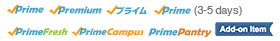

In [5]:
new_webpage = requests.get(product_list, headers=HEADERS)
new_soup = BeautifulSoup(new_webpage.content, "html.parser")
new_soup

In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [7]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'class':'a-price a-text-price a-size-medium apexPriceToPay'}).find("span", attrs={'class':'a-offscreen'}).string.strip()

    except AttributeError:
        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4 cm-cr-review-stars-spacing-big'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating
# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [8]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=jeans+for+women&s=exact-aware-popularity-rank&page=2&crid=2E5TN6KQJPEJR&qid=1721666415&sprefix=%2Caps%2C276&ref=sr_pg_2"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objectshttps://www.amazon.com/s?k=jeans+for+women&s=exact-aware-popularity-rank&crid=2E5TN6KQJPEJR&qid=1721333107&sprefix=%2Caps%2C276&ref=sr_st_exact-aware-popularity-rank&ds=v1%3AkXkNlqArAW81%2FRcTybDpT7oxxUoZ6IMa6HjQUYCovBE
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
     # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [14]:
amazon_df

,title,price,rating,reviews,availability
0,NYDJ Women's Teresa Trouser Wide Leg Jeans in ...,$35.98,4.2 out of 5 stars,"1,125 ratings",Not Available
1,Women's Jeans 90s Mid Rise Bootcut Jeans High ...,$37.99,4.0 out of 5 stars,"1,419 ratings",Not Available
2,Levi's Women's New Boyfriend Jeans (Also Avail...,$39.99,4.2 out of 5 stars,"9,046 ratings",Not Available
3,Lee Women’s Instantly Slims Classic Relaxed Fi...,$18.35,4.2 out of 5 stars,"28,264 ratings",Not Available
4,Gloria Vanderbilt Women's Amanda Capri Jean,$24.99,4.3 out of 5 stars,"4,770 ratings",Not Available
5,PLNOTME Women's Baggy Boyfriend Jeans Vintage ...,$47.98,4.1 out of 5 stars,448 ratings,Not Available
6,Gloria Vanderbilt Women's Amanda Capri Jeans,$10.29,4.3 out of 5 stars,"5,894 ratings",Not Available
7,Levi's Women's 725 High Rise Bootcut Jeans (Al...,$48.65,4.3 out of 5 stars,"5,122 ratings",Not Available
8,GRAPENT Wide Leg Jeans for Women High Waisted ...,$29.59,4.0 out of 5 stars,149 ratings,Not Available
9,GRAPENT Wide Leg Jeans for Women Stretch High ...,$41.99,4.1 out of 5 stars,654 ratings,Not Available
